<h3> Toy Car Sales Data Project: Part 1

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import ExcelWriter
import openpyxl

In [41]:
raw_data = pd.read_csv("Data/sales_data_sample_formatted.csv")

- Based on an initial look at the data we will just do some detailed visualisation to get used to matplotlib.
- Will see if any ML modelling is appropriate later.

In [42]:
raw_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10100,30,100.00,3,5151.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
1,10100,50,67.80,2,3390.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
2,10100,22,86.51,4,1903.22,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,Nashua,USA,NaN,Small
3,10100,49,34.47,1,1689.03,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,Nashua,USA,NaN,Small
4,10101,25,100.00,4,3782.00,01/09/2003 00:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",Frankfurt,Germany,EMEA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10425,49,100.00,9,5510.54,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,127,S24_2300,La Rochelle Gifts,Nantes,France,EMEA,Medium
2819,10425,31,33.24,5,1030.44,5/31/2005 0:00,In Process,2,5,2005,Classic Cars,35,S24_2840,La Rochelle Gifts,Nantes,France,EMEA,Small
2820,10425,41,86.68,11,3553.88,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,96,S32_1268,La Rochelle Gifts,Nantes,France,EMEA,Medium
2821,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,54,S32_2509,La Rochelle Gifts,Nantes,France,EMEA,Small


In [43]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  COUNTRY          2823 non-null   object 
 16  TERRITORY        1749 non-null   object 
 17  DEALSIZE      

raw_data.describe()

In [44]:
raw_data["PRODUCTLINE"].unique()

array(['Vintage Cars', 'Classic Cars', 'Trucks and Buses', 'Trains',
       'Ships', 'Planes', 'Motorcycles'], dtype=object)

In [45]:
data = raw_data.copy()

In [46]:
data.drop(columns=["ORDERNUMBER","ORDERLINENUMBER"])

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,30,100.00,5151.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
1,50,67.80,3390.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
2,22,86.51,1903.22,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,Nashua,USA,NaN,Small
3,49,34.47,1689.03,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,Nashua,USA,NaN,Small
4,25,100.00,3782.00,01/09/2003 00:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",Frankfurt,Germany,EMEA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,49,100.00,5510.54,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,127,S24_2300,La Rochelle Gifts,Nantes,France,EMEA,Medium
2819,31,33.24,1030.44,5/31/2005 0:00,In Process,2,5,2005,Classic Cars,35,S24_2840,La Rochelle Gifts,Nantes,France,EMEA,Small
2820,41,86.68,3553.88,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,96,S32_1268,La Rochelle Gifts,Nantes,France,EMEA,Medium
2821,11,43.83,482.13,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,54,S32_2509,La Rochelle Gifts,Nantes,France,EMEA,Small


<h4> Separating into Countries

- Needed help from ChatGPT to create new dataframes which separates the data into unique countries (so that each dataframe has only one country)

In [47]:
countries = data["COUNTRY"].unique()
countries

array(['USA', 'Germany', 'Norway', 'Spain', 'Denmark', 'Italy',
       'Philippines', 'UK', 'Sweden', 'France', 'Belgium', 'Singapore',
       'Austria', 'Australia', 'Finland', 'Canada', 'Japan', 'Ireland',
       'Switzerland'], dtype=object)

In [48]:
column_to_filter ='COUNTRY'
unique_values = data[column_to_filter].unique()

countryDictDFs = {val: data[data[column_to_filter] == val] for val in unique_values}

In [49]:
USA_data = countryDictDFs['USA']
type(USA_data)

pandas.core.frame.DataFrame

- Comparing countries:

Finding the number of orders, average order size (QUANTITYORDERED), order price (SALES), average price per item (PRICEEACH) and what time of the year is popular (MONTH_ID + QTR_ID).

Starting with the USA:

- Number of orders:

In [50]:
USA_sales_quant = USA_data.shape[0]
USA_sales_quant

## Total of 1004 orders

1004

- Average order size (QUANTITYORDERED)

In [51]:
USA_average_order_size = USA_data["QUANTITYORDERED"].mean()

- Average price per order (SALES)

In [52]:
USA_average_sales = USA_data["SALES"].mean()
USA_average_sales

3613.5287151394423

- Average price per item (PRICEEACH)

In [53]:
USA_average_PPI = USA_data["PRICEEACH"].mean()
USA_average_PPI

83.82435258964144

- Popular time to be shopping (MONTH_ID + QTR_ID)

Organise into bins (each bin unique month/quarter), then tally up / calculate sums/averages.

1. Number of orders in each period

In [54]:
# Monthly:

# Doing it for all the months and then putting into a dictionary

USA_monthly_array = []

for i in range(1,13):
    month_quant = USA_data[USA_data['MONTH_ID'] == i].shape[0]
    USA_monthly_array.append(month_quant)


months = [1,2,3,4,5,6,7,8,9,10,11,12]

USA_monthly_quant = {key:value for key, value in zip(months, USA_monthly_array)}
USA_monthly_quant


{1: 69,
 2: 66,
 3: 71,
 4: 53,
 5: 85,
 6: 48,
 7: 56,
 8: 112,
 9: 44,
 10: 119,
 11: 205,
 12: 76}

In [55]:
# Quarterly:

USA_quarter_array = []

for i in range(1,5):
    quart_quant = USA_data[USA_data['QTR_ID'] == i].shape[0]
    USA_quarter_array.append(quart_quant)

quarters = [1,2,3,4]

USA_quarter_quant = {key:value for key, value in zip(quarters, USA_quarter_array)}
USA_quarter_quant


{1: 206, 2: 186, 3: 212, 4: 400}

2. Total sales (revenue) per period

In [56]:
# Monthly:

# Do in similar manner to when the original dataset was organised into countries.

# 1. Make a new dictionary of dataframes by separating the original dataset into unique months:
 
column_to_filter ='MONTH_ID'
unique_values = USA_data[column_to_filter].unique()

USA_months_DictDFs = {val: USA_data[USA_data[column_to_filter] == val] for val in unique_values}

# Caluclate the SUM of of the SALES column in each month and transfer to new dictionary:

USA_monthly_total_SALES = {val: USA_months_DictDFs[val]['SALES'].sum()  for val in unique_values}
USA_monthly_total_SALES

{1: 232862.06999999998,
 2: 248421.79,
 3: 268806.28,
 4: 207625.7,
 5: 300412.73,
 6: 175897.41999999998,
 7: 207946.16,
 8: 397979.1,
 9: 144178.91,
 10: 416077.17000000004,
 11: 741331.6799999999,
 12: 286443.82}

In [57]:
# Quarterly:

column_to_filter ='QTR_ID'
unique_values = USA_data[column_to_filter].unique()

USA_qtrs_DictDFs = {val: USA_data[USA_data[column_to_filter] == val] for val in unique_values}

USA_qtrly_total_SALES = {val: USA_qtrs_DictDFs[val]['SALES'].sum()  for val in unique_values}
USA_qtrly_total_SALES

{1: 750090.1400000001,
 2: 683935.85,
 3: 750104.1700000002,
 4: 1443852.6700000002}

3. Average sales (revenue) per period

In [58]:
#Similar way to finding the total sales per period. 

# Monthly:

column_to_filter ='MONTH_ID'
unique_values = USA_data[column_to_filter].unique()

# Calculate the MEAN of of the SALES column in each month and transfer to new dictionary:

USA_monthly_average_SALES = {val: USA_months_DictDFs[val]['SALES'].mean() for val in unique_values}
USA_monthly_average_SALES


{1: 3374.8126086956518,
 2: 3763.966515151515,
 3: 3786.0039436619722,
 4: 3917.466037735849,
 5: 3534.2674117647057,
 6: 3664.529583333333,
 7: 3713.324285714286,
 8: 3553.3848214285713,
 9: 3276.7934090909093,
 10: 3496.4468067226894,
 11: 3616.2520975609755,
 12: 3768.9976315789477}

In [59]:
#  Quarterly:

column_to_filter ='QTR_ID'
unique_values = USA_data[column_to_filter].unique()

# Calculate the MEAN of of the SALES column in each month and transfer to new dictionary:

USA_qtrly_average_SALES = {val: USA_qtrs_DictDFs[val]['SALES'].mean()  for val in unique_values}
USA_qtrly_average_SALES

{1: 3641.2142718446607,
 2: 3677.0744623655914,
 3: 3538.2272169811326,
 4: 3609.6316750000005}

<h4>Investigating the popular product categories (in USA):

In [60]:
USA_data["PRODUCTLINE"].unique()

array(['Vintage Cars', 'Motorcycles', 'Classic Cars', 'Trucks and Buses',
       'Trains', 'Ships', 'Planes'], dtype=object)

There are 7 unique product types.

In [61]:
product_types = list(USA_data["PRODUCTLINE"].unique())

orders_per_product = []

for item in product_types:
    order_quant = USA_data[USA_data['PRODUCTLINE'] == item].shape[0]
    orders_per_product.append(order_quant)


USA_orders_per_product = {key:value for key, value in zip(product_types, orders_per_product)}
USA_orders_per_product

{'Vintage Cars': 224,
 'Motorcycles': 149,
 'Classic Cars': 329,
 'Trucks and Buses': 112,
 'Trains': 25,
 'Ships': 70,
 'Planes': 95}

*The next step would be doing this in a pipeline so that all the countries can be done in a single script*

<h3> Visualisation of the Monthly / Quarterly USA Data

In [62]:
# Visualising the following:

USA_monthly_quant # Total orders (monthly)

USA_quarter_quant # Total orders (quarterly)

USA_monthly_total_SALES # Total sales (monthly)

USA_qtrly_total_SALES # Total sales (quarterly)

USA_monthly_average_SALES # Average sale amount (monthly)

USA_qtrly_average_SALES # Average sale amount (quarterly)

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
quarters = ['Q1','Q2','Q3','Q4']


Text(0, 0.5, 'No. Orders')

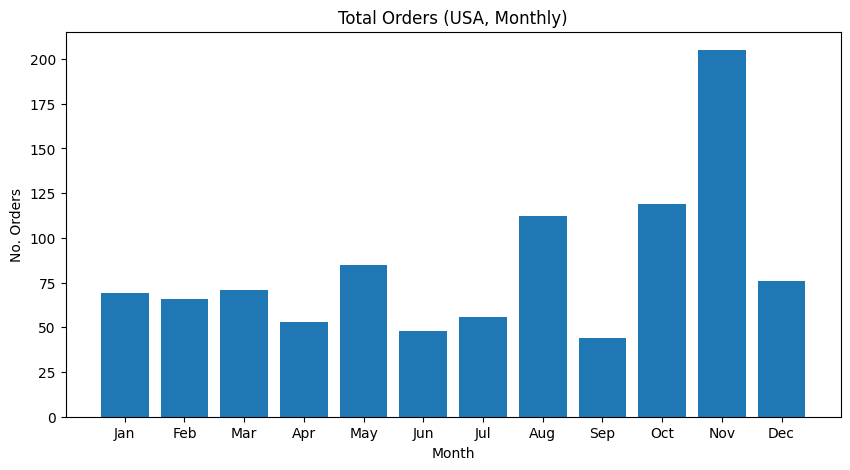

In [63]:
data = USA_monthly_quant
values = list(data.values())

plt.figure(figsize=(10,5))
plt.bar(months, values)
plt.title('Total Orders (USA, Monthly)')
plt.xlabel('Month')
plt.ylabel('No. Orders')

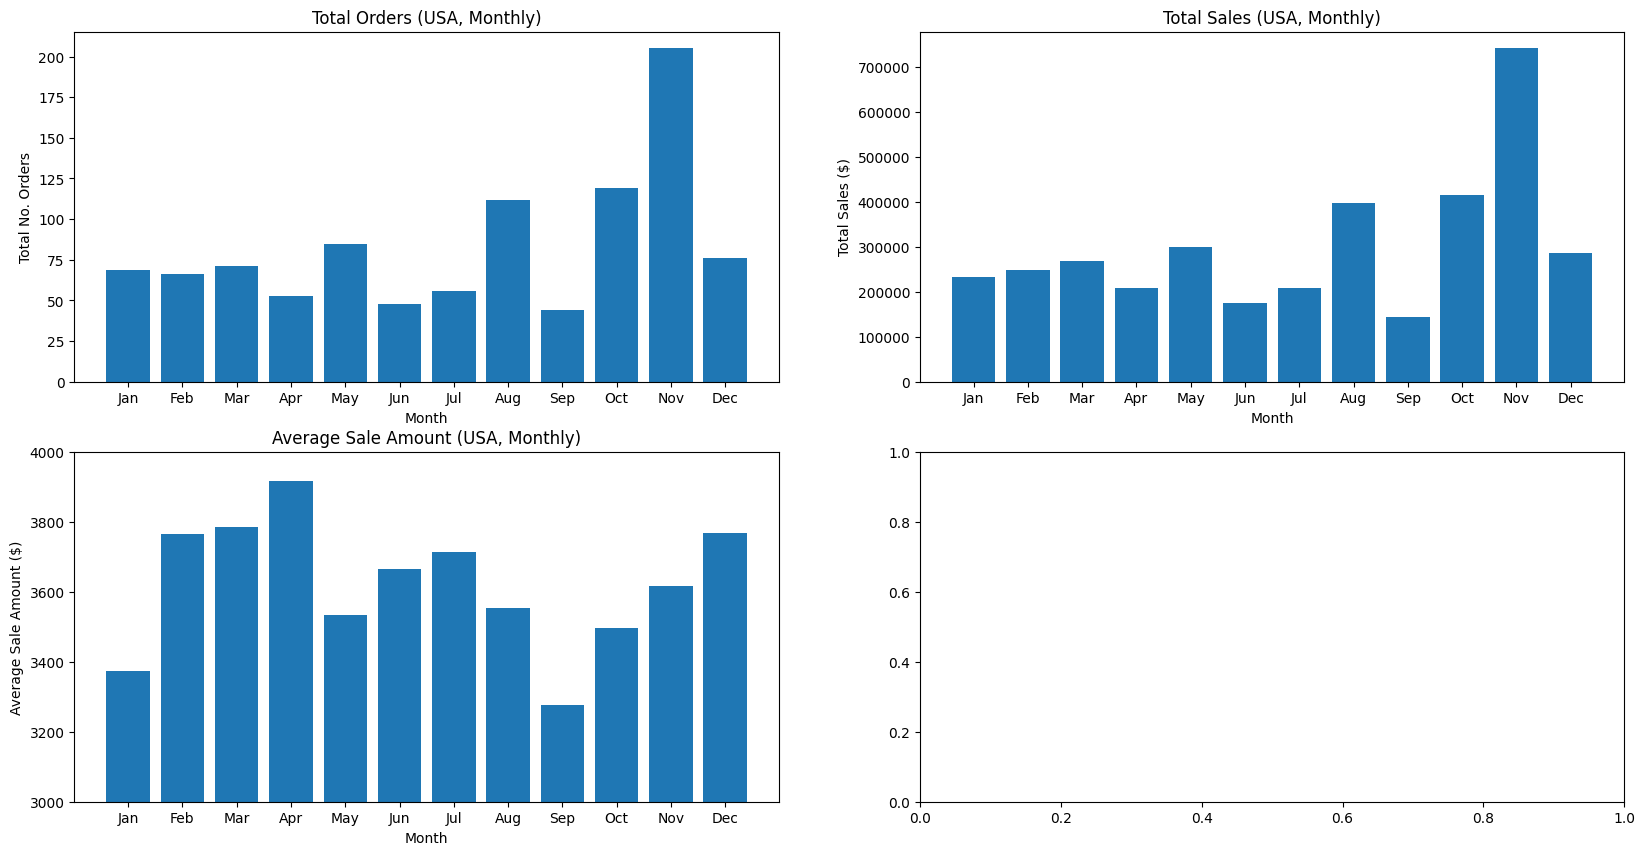

In [64]:
# Plotting all the monthly data (3 plots) on a subplot:

fig,axs = plt.subplots(2,2,figsize=(20,10))

axs[0,0].bar(months,list(USA_monthly_quant.values()))
axs[0,0].set_title('Total Orders (USA, Monthly)')
axs[0,0].set(xlabel='Month', ylabel='Total No. Orders')

axs[0,1].bar(months,list(USA_monthly_total_SALES.values()))
axs[0,1].set_title('Total Sales (USA, Monthly)')
axs[0,1].set(xlabel='Month', ylabel='Total Sales ($)')

axs[1,0].bar(months,list(USA_monthly_average_SALES.values()))
axs[1,0].set_ylim([3000,4000])
axs[1,0].set_title('Average Sale Amount (USA, Monthly)')
axs[1,0].set(xlabel='Month', ylabel='Average Sale Amount ($)')

plt.show()

[Text(0.5, 0, 'Quarter'), Text(0, 0.5, 'Average Sale Amount ($)')]

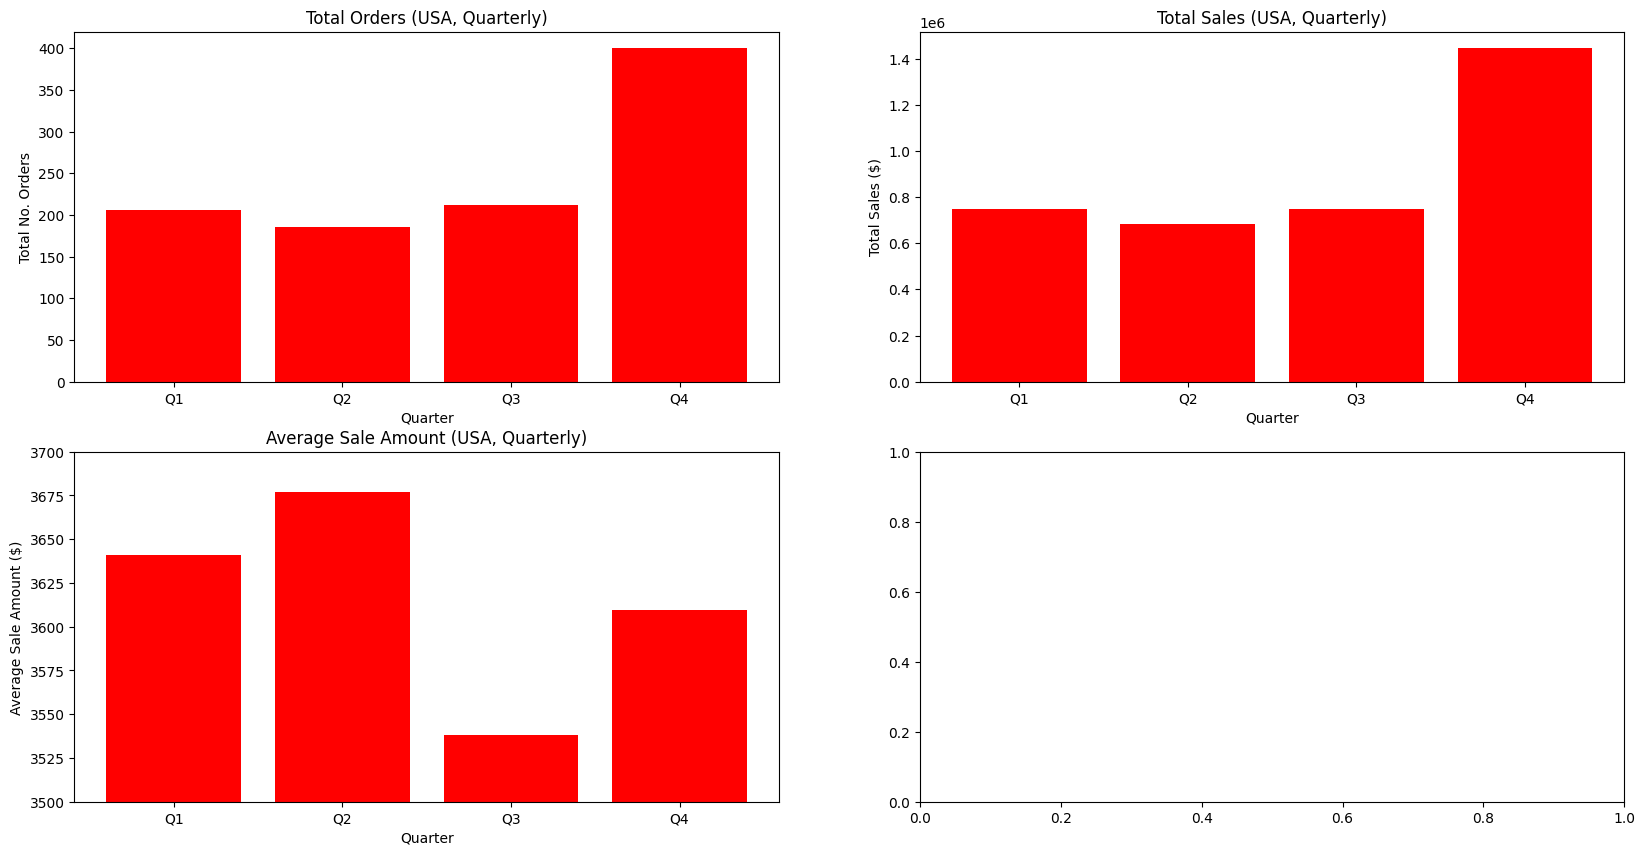

In [65]:
# Plotting all the quarterly data (3 plots) on a subplot:

fig,axs = plt.subplots(2,2,figsize=(20,10))

axs[0,0].bar(quarters,list(USA_quarter_quant.values()),color='red')
axs[0,0].set_title('Total Orders (USA, Quarterly)')
axs[0,0].set(xlabel='Quarter', ylabel='Total No. Orders')

axs[0,1].bar(quarters,list(USA_qtrly_total_SALES.values()),color='red')
axs[0,1].set_title('Total Sales (USA, Quarterly)')
axs[0,1].set(xlabel='Quarter', ylabel='Total Sales ($)')

axs[1,0].bar(quarters,list(USA_qtrly_average_SALES.values()),color='red')
axs[1,0].set_ylim([3500,3700])
axs[1,0].set_title('Average Sale Amount (USA, Quarterly)')
axs[1,0].set(xlabel='Quarter', ylabel='Average Sale Amount ($)')


Text(0, 0.5, 'No. Orders')

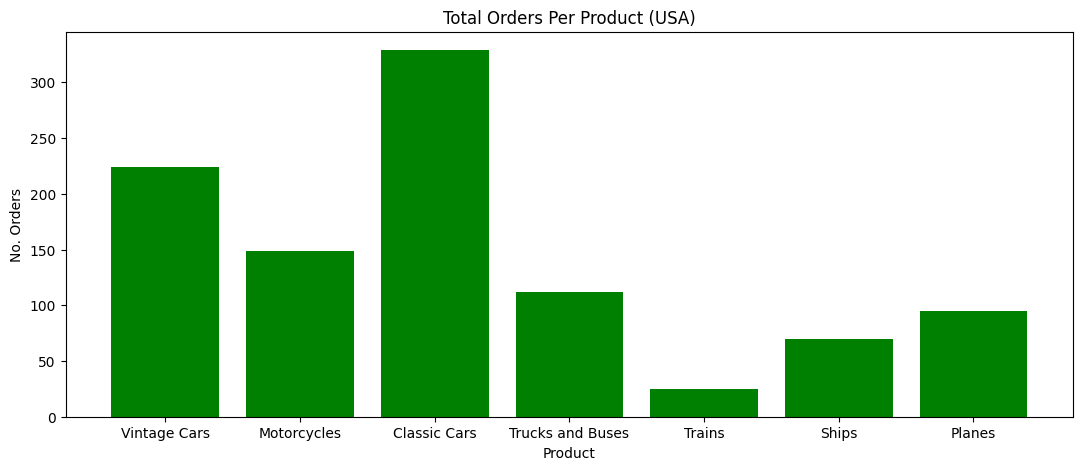

In [66]:
data = USA_orders_per_product
product_types = list(USA_data["PRODUCTLINE"].unique())
values = list(data.values())

plt.figure(figsize=(13,5))
plt.bar(product_types, values,color='green')
plt.title('Total Orders Per Product (USA)')
plt.xlabel('Product')
plt.ylabel('No. Orders')

<h4>Exporting The Various Dataframes into an Excel Workbook (Different Sheet for each df):

In [67]:
# List of dataframes:

USA_monthly_quant = pd.DataFrame(USA_monthly_quant,index=[0]).transpose()# Total orders (monthly)

USA_quarter_quant = pd.DataFrame(USA_quarter_quant,index=[0]).transpose() # Total orders (quarterly)

USA_monthly_total_SALES = pd.DataFrame(USA_monthly_total_SALES,index=[0]).transpose() # Total sales (monthly)

USA_qtrly_total_SALES = pd.DataFrame(USA_qtrly_total_SALES,index=[0]).transpose() # Total sales (quarterly)

USA_monthly_average_SALES = pd.DataFrame(USA_monthly_average_SALES,index=[0]).transpose() # Average sale amount (monthly)

USA_qtrly_average_SALES = pd.DataFrame(USA_qtrly_average_SALES,index=[0]).transpose() # Average sale amount (quarterly)

USA_orders_per_product = pd.DataFrame(USA_orders_per_product,index=[0]).transpose() # Number of orders made for each unique product type


In [68]:
with pd.ExcelWriter('USA_Data_Analysed.xlsx') as writer:
    USA_monthly_quant.to_excel(writer, sheet_name="TTL_ORDERS_M")
    USA_quarter_quant.to_excel(writer, sheet_name="TTL_ORDERS_Q")
    USA_monthly_total_SALES.to_excel(writer, sheet_name="TTL_SALES_M")
    USA_qtrly_total_SALES.to_excel(writer, sheet_name="TTL_SALES_Q")
    USA_monthly_average_SALES.to_excel(writer, sheet_name="MEAN_SALES_M")
    USA_qtrly_average_SALES.to_excel(writer, sheet_name="MEAN_SALES_Q")
    USA_orders_per_product.to_excel(writer, sheet_name="TTL_ORDERS_PROD")

<h4> Comparing Countries

- Each country has its own df in the following dictionary: countryDictDFs
- The countries are: 

In [69]:
countries

array(['USA', 'Germany', 'Norway', 'Spain', 'Denmark', 'Italy',
       'Philippines', 'UK', 'Sweden', 'France', 'Belgium', 'Singapore',
       'Austria', 'Australia', 'Finland', 'Canada', 'Japan', 'Ireland',
       'Switzerland'], dtype=object)

- USA already has its own df:

In [70]:
USA_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10100,30,100.00,3,5151.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
1,10100,50,67.80,2,3390.00,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,Nashua,USA,NaN,Medium
2,10100,22,86.51,4,1903.22,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,Nashua,USA,NaN,Small
3,10100,49,34.47,1,1689.03,01/06/2003 00:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,Nashua,USA,NaN,Small
8,10102,39,100.00,2,4808.31,01/10/2003 00:00,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,NYC,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10414,47,65.52,9,3079.44,05/06/2005 00:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,Boston,USA,NaN,Medium
2795,10421,35,100.00,1,5433.75,5/29/2005 0:00,In Process,2,5,2005,Vintage Cars,168,S18_2795,Mini Gifts Distributors Ltd.,San Rafael,USA,NaN,Medium
2796,10421,40,45.70,2,1828.00,5/29/2005 0:00,In Process,2,5,2005,Vintage Cars,44,S24_2022,Mini Gifts Distributors Ltd.,San Rafael,USA,NaN,Small
2797,10422,51,95.55,2,4873.05,5/30/2005 0:00,In Process,2,5,2005,Vintage Cars,102,S18_1342,Diecast Classics Inc.,Allentown,USA,NaN,Medium


- Next step is to do the same, but for the rest of the countries.
- Creating new variables, each containing a unique dataframe for each unique country (and then finding the sales by country and orders by country, as dictionaries)

In [71]:
orders_by_country_raw = []
sales_by_country_raw = []

for item in countries:
    var_name = str(item +"_data")
    globals()[var_name] = pd.DataFrame(countryDictDFs[item])
    orders, columns = globals()[var_name].shape
    country_sales = globals()[var_name]['SALES'].sum()

    orders_by_country_raw.append(orders)
    sales_by_country_raw.append(country_sales)

orders_by_country = dict(zip(countries, orders_by_country_raw))
sales_by_country = dict(zip(countries, sales_by_country_raw))



In [72]:
orders_by_country

{'USA': 1004,
 'Germany': 62,
 'Norway': 85,
 'Spain': 342,
 'Denmark': 63,
 'Italy': 113,
 'Philippines': 26,
 'UK': 144,
 'Sweden': 57,
 'France': 314,
 'Belgium': 33,
 'Singapore': 79,
 'Austria': 55,
 'Australia': 185,
 'Finland': 92,
 'Canada': 70,
 'Japan': 52,
 'Ireland': 16,
 'Switzerland': 31}

- Finding the unique product types and then finding the popularity of the products in each country.
- We have a separate dataframe for each country. We need to separate each country's data into bins determined by the product type.
- Similar to the code used for the 'USA_data'. Just need to do in a loop for all the countries.

In [73]:
product_types = raw_data['PRODUCTLINE'].unique()
product_types

array(['Vintage Cars', 'Classic Cars', 'Trucks and Buses', 'Trains',
       'Ships', 'Planes', 'Motorcycles'], dtype=object)

In [74]:
# The code that was used for the USA_data popular product types:

# product_types = list(USA_data["PRODUCTLINE"].unique())

# orders_per_product = []

# for item in product_types:
    #order_quant = USA_data[USA_data['PRODUCTLINE'] == item].shape[0]
    #orders_per_product.append(order_quant)


#USA_orders_per_product = {key:value for key, value in zip(product_types, orders_per_product)}

In [75]:
product_types = raw_data['PRODUCTLINE'].unique()

## Creating empty arrays (one for each country) to organise the number of orders for each product....

for country in countries:
    globals()[str(country+"_orders_by_product")] = []

## Then filling the arrays:

for country in countries:
    var_name = str(country +"_data")
    country_data = globals()[var_name]

    for product in product_types:
        order_quant = country_data[country_data['PRODUCTLINE'] == product].shape[0]
        globals()[str(country+"_orders_by_product")].append(order_quant)
    
    globals()[str(country+'_orders_per_product_f')] = {key:value for key, value in zip(product_types, globals()[str(country+"_orders_by_product")])}
    
## The loops are a bit confusing but it seems to work
## The dictionary for each country, detailing the orders for each product type are in general: {country}_order_per_product_f
    

In [76]:
USA_orders_per_product_f

{'Vintage Cars': 224,
 'Classic Cars': 329,
 'Trucks and Buses': 112,
 'Trains': 25,
 'Ships': 70,
 'Planes': 95,
 'Motorcycles': 149}

<h3>Exporting the additional data to Excel:

A reminder of the code used to save the detailed US_data metrics we generated as separate sheets in the same Excel workbook:

In [77]:
#with pd.ExcelWriter('USA_Data_Analyased.xlsx') as writer:
#    USA_monthly_quant.to_excel(writer, sheet_name="TTL_ORDERS_M")
#    USA_quarter_quant.to_excel(writer, sheet_name="TTL_ORDERS_Q")
#    USA_monthly_total_SALES.to_excel(writer, sheet_name="TTL_SALES_M")
#    USA_qtrly_total_SALES.to_excel(writer, sheet_name="TTL_SALES_Q")
#    USA_monthly_average_SALES.to_excel(writer, sheet_name="MEAN_SALES_M")
#    USA_qtrly_average_SALES.to_excel(writer, sheet_name="MEAN_SALES_Q")
#    USA_orders_per_product.to_excel(writer, sheet_name="TTL_ORDERS_PROD")

For each country, we have:
1. General data.
2. Sales by product

We also have two additional sets:
1. Orders per country
2. Total sales per country

We will now generate some additional workbooks:
1. General countries (one sheet for each country)
2. Total orders and total sales per country (one sheet for orders and one sheet for sales)

<h4>General countries data notebook:

In [78]:

with pd.ExcelWriter('Data_by_country.xlsx') as writer:
    for country in countries:
        var_name = country+"_data"
        globals()[var_name].to_excel(writer, sheet_name=str(var_name))
    

In [79]:
orders_by_country

{'USA': 1004,
 'Germany': 62,
 'Norway': 85,
 'Spain': 342,
 'Denmark': 63,
 'Italy': 113,
 'Philippines': 26,
 'UK': 144,
 'Sweden': 57,
 'France': 314,
 'Belgium': 33,
 'Singapore': 79,
 'Austria': 55,
 'Australia': 185,
 'Finland': 92,
 'Canada': 70,
 'Japan': 52,
 'Ireland': 16,
 'Switzerland': 31}

<h4> Total orders and total sales per country:

In [80]:
sales_by_country_df = pd.DataFrame(sales_by_country, index=[0]).transpose()
orders_by_country_df = pd.DataFrame(orders_by_country, index=[0]).transpose()

In [81]:
sales_by_country_df

,0
USA,3627982.83
Germany,220472.09
Norway,307463.70
Spain,1215686.92
Denmark,245637.15
Italy,374674.31
Philippines,94015.73
UK,478880.46
Sweden,210014.21
France,1110916.52


In [82]:
with pd.ExcelWriter('total_sales_and_orders_by_country.xlsx') as writer_2:
    sales_name = "total_sales_by_country"
    sales_by_country_df.to_excel(writer_2, sheet_name=str(sales_name))
    orders_name = "orders_by_country"
    orders_by_country_df.to_excel(writer_2, sheet_name=str(orders_name))